<a href="https://colab.research.google.com/github/gauravagrwal/Python-Scripts/blob/main/Visualizing_COVID_19_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline  
#plt.style.use('fivethirtyeight')      

%matplotlib inline renders the graphs in the cells

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df ['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


# Worldwide Insights

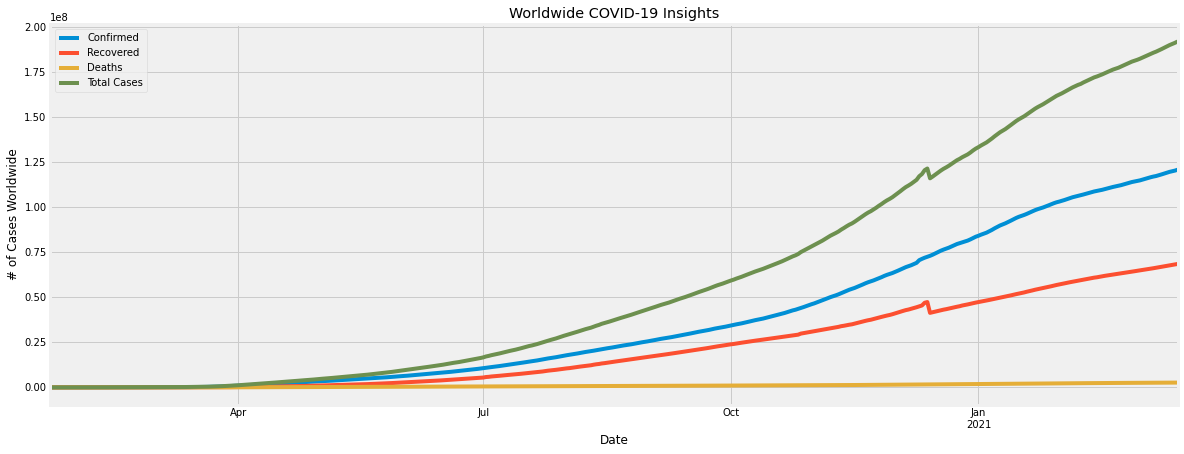

In [14]:
worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize = (18,7))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID-19 Insights')

plt.show()

# Worldwide Vs. Country Insight

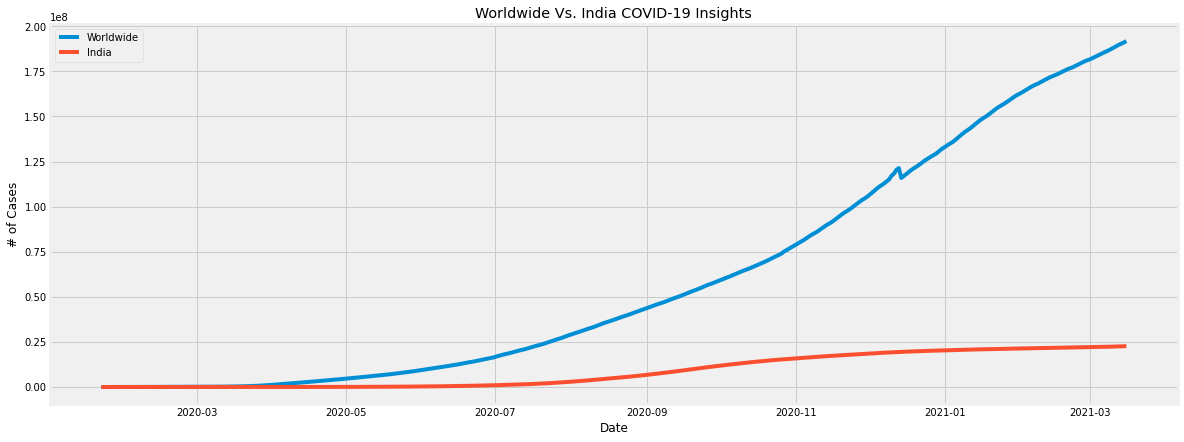

In [15]:
country_df = df[df['Country'] == 'India'].groupby(['Date']).sum()
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(country_df[['Total Cases']], label = 'India')
ax.set_xlabel('Date')
ax.set_ylabel('# of Cases')
ax.title.set_text('Worldwide Vs. India COVID-19 Insights')

plt.legend(loc = 'upper left')

# Country Specific Insights

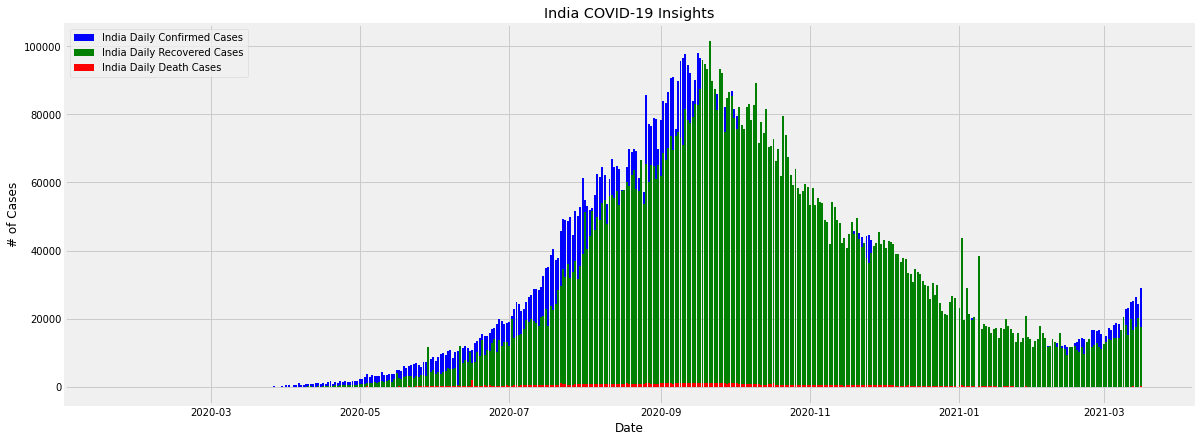

In [16]:
country_df = country_df.reset_index()
country_df['Daily Confirmed'] = country_df['Confirmed'].sub(country_df['Confirmed'].shift())
country_df['Daily Recovered'] = country_df['Recovered'].sub(country_df['Recovered'].shift())
country_df['Daily Deaths'] = country_df['Deaths'].sub(country_df['Deaths'].shift())

fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111)

ax.bar(country_df['Date'], country_df['Daily Confirmed'], color='b', label='India Daily Confirmed Cases')
ax.bar(country_df['Date'], country_df['Daily Recovered'], color='g', label='India Daily Recovered Cases')
ax.bar(country_df['Date'], country_df['Daily Deaths'], color='r', label='India Daily Death Cases')

ax.set_xlabel('Date')
ax.set_ylabel('# of Cases')
ax.title.set_text('India COVID-19 Insights')

plt.legend(loc = 'upper left')

# Most Affected Countries

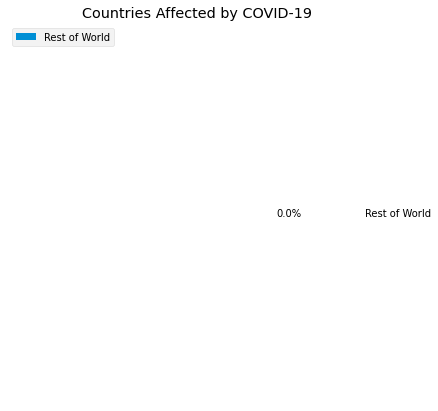

In [25]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Countries Affected by COVID-19')

plt.legend(loc = 'upper left')